In [173]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime
from numpy import log as ln

In [93]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [87]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
%config InlineBackend.figure_format = 'retina'

In [62]:
tickers = ["AMER3.SA", "MGLU3.SA", "VIIA3.SA", "ITUB4.SA", "SANB3.SA", "BBDC4.SA"] 

In [63]:
dict_results = dict()

In [180]:
for ticker in tickers:
    dict_results[ticker] = yf.Ticker(ticker).history(start="2016-01-01", end="2022-11-03")
    
    df = dict_results[ticker]
    df['lag_1'] = df['Close'].shift(1)
    df['log_return'] = ln(df['Close']/df['lag_1'])
    dict_results[ticker] = df

In [70]:
for key in dict_results.keys():
    print(key)
    display(dict_results[key].head(3))
    print('\n'*5)

AMER3.SA


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04 00:00:00-02:00,14.355440,14.610943,13.711953,13.711953,184396,0.0,0
2016-01-05 00:00:00-02:00,13.872825,13.939066,13.437524,13.910677,197863,0.0,0
2016-01-06 00:00:00-02:00,13.844436,13.986382,13.598397,13.986382,238886,0.0,0








MGLU3.SA


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04 00:00:00-02:00,0.063193,0.068227,0.061963,0.066922,138547200,0.0,0.0
2016-01-05 00:00:00-02:00,0.068264,0.069271,0.066922,0.067593,96179200,0.0,0.0
2016-01-06 00:00:00-02:00,0.067593,0.068227,0.061740,0.061740,117324800,0.0,0.0








VIIA3.SA


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04 00:00:00-02:00,1.411720,1.560846,1.193003,1.193003,17800,0.0,0
2016-01-05 00:00:00-02:00,1.202945,1.461429,1.143295,1.242712,21900,0.0,0
2016-01-06 00:00:00-02:00,1.193003,1.242712,1.193003,1.242712,20100,0.0,0








ITUB4.SA


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04 00:00:00-02:00,11.797860,11.875238,11.438280,11.438280,38071770,0.009091,0.0
2016-01-05 00:00:00-02:00,11.561174,11.734136,11.415521,11.533864,21093105,0.000000,0.0
2016-01-06 00:00:00-02:00,11.379110,11.756896,11.288077,11.488349,33520575,0.000000,0.0








SANB3.SA


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04 00:00:00-02:00,5.698418,5.705533,5.549022,5.549022,4000,0.38014,0
2016-01-05 00:00:00-02:00,5.549023,5.691305,5.349827,5.349827,5600,0.00000,0
2016-01-06 00:00:00-02:00,5.264457,5.356941,5.264457,5.264457,4200,0.00000,0








BBDC4.SA


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-01-04 00:00:00-02:00,6.676727,6.767997,6.592478,6.669706,22798501.0,0.000000,0.0
2016-01-05 00:00:00-02:00,6.718539,6.778275,6.609609,6.693942,16877732.0,0.008926,0.0
2016-01-06 00:00:00-02:00,6.595556,6.676374,6.486624,6.599069,31314962.0,0.000000,0.0


In [159]:
def plot_series_acf_pacf(ts, ts_name, compute_variance=False):

    fig, ax = plt.subplots(nrows=1, figsize=(10,4), dpi=100)

    # Usual Differencing
    ax.plot(ts, label= f'Series {ts_name}')
    ax.set_title(f'Series for {ts_name}', fontsize=18)
    ax.legend(loc='upper left', fontsize=10)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Orders", fontsize=12)
    ax.grid(linestyle='--', alpha=0.3);

    
    if compute_variance == True:
        variance = list()

        for i in range(len(ts)):
            ts_now = ts[ts.index <= ts.index[i]]
            current_var = np.var(ts_now)
            variance.append(current_var)

        variance_ts = pd.Series(data=variance, index=ts.index)
        ax2 = ax.twinx()
        ax2.plot(variance_ts, 'orange', label='Variance', alpha=0.5)
        
        ax2.legend(loc='upper right', fontsize=10)
        ax2.spines['right'].set_visible(False)
        ax2.spines['left'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax2.set_xlabel("Date", fontsize=12)
        ax2.set_ylabel("Orders", fontsize=12)
        plt.fill_between(variance_ts.index, y1=variance_ts, y2=0, alpha=0.15, color='orange')

        
    # LOG RETURN 
    fig, ax = plt.subplots(nrows=1, figsize=(10,4), dpi=100)

    # Usual Differencing
    ax.plot(ts, label= f'Series {ts_name}')
    ax.set_title(f'Series for {ts_name}', fontsize=18)
    ax.legend(loc='upper left', fontsize=10)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Orders", fontsize=12)
    ax.grid(linestyle='--', alpha=0.3);

    
    fig, ax = plt.subplots(nrows=3, figsize=(10,8), dpi=200)
    plot_acf(ts, ax=ax[0])
    plot_pacf(ts, ax=ax[1])
    
    for i in [0,1]:
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['left'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
        ax[i].grid(linestyle='--', alpha=0.3);

        
    sm.qqplot(ts, line ='45')

        
    fig.tight_layout()

In [205]:
def plot_series_analysis(df_i, ts_name, compute_variance=False):

    ts = df_i['Close']
    
    fig, ax = plt.subplots(nrows=1, figsize=(10,4), dpi=100)

    # Usual Differencing
    ax.plot(ts, label= f'Series {ts_name}')
    ax.set_title(f'Series for {ts_name}', fontsize=18)
    ax.legend(loc='upper left', fontsize=10)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Orders", fontsize=12)
    ax.grid(linestyle='--', alpha=0.3);
    
    if compute_variance == True:
        variance = list()

        for i in range(len(ts)):
            ts_now = ts[ts.index <= ts.index[i]]
            current_var = np.var(ts_now)
            variance.append(current_var)

        variance_ts = pd.Series(data=variance, index=ts.index)
        ax2 = ax.twinx()
        ax2.plot(variance_ts, 'orange', label='Variance', alpha=0.5)
        
        ax2.legend(loc='upper right', fontsize=10)
        ax2.spines['right'].set_visible(False)
        ax2.spines['left'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax2.set_xlabel("Date", fontsize=12)
        ax2.set_ylabel("Orders", fontsize=12)
        plt.fill_between(variance_ts.index, y1=variance_ts, y2=0, alpha=0.15, color='orange')

In [433]:
def plot_log_return_analysis(df_i, ts_name, compute_variance=False):

    ts = df_i['log_return']
    
    fig, ax = plt.subplots(nrows=2, figsize=(10,4), dpi=100)

    # Usual Differencing
    ax[0].plot(ts, label= f'Series {ts_name}', linewidth=0.5, color='black')
    ax[0].set_title(f'Series for {ts_name}', fontsize=18)
    ax[0].legend(loc='upper left', fontsize=10)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['left'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    ax[0].set_xlabel("Date", fontsize=12)
    ax[0].set_ylabel("y", fontsize=12)
    ax[0].grid(linestyle='--', alpha=0.3);
    
    ts_squared = ts**2
    
    # Usual Differencing
    ax[1].plot(ts_squared, label= f'Series {ts_name} squared', linewidth=0.5, color='black')
    ax[1].legend(loc='upper left', fontsize=10)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].spines['top'].set_visible(False)
    ax[1].set_xlabel("Date", fontsize=12)
    ax[1].set_ylabel("y", fontsize=12)
    ax[1].grid(linestyle='--', alpha=0.3);

    
    
    # PLOT ACFS ______________________________________________________
    fig, ax_acfs = plt.subplots(nrows=2, figsize=(12,8))
    
    plot_acf(ts.dropna(), ax_acfs[0]);
    
    # ACF log return squared
#     ax_acfs[0].set_title(f'ACF for {ts_name}', fontsize=18)
    ax_acfs[0].spines['right'].set_visible(False)
    ax_acfs[0].spines['left'].set_visible(False)
    ax_acfs[0].spines['top'].set_visible(False)
    ax_acfs[0].set_xlabel("Date", fontsize=12)
    ax_acfs[0].set_ylabel("Orders", fontsize=12)
    ax_acfs[0].grid(linestyle='--', alpha=0.3);
    
    
    plot_acf(ts_squared.dropna(), ax_acfs[1], label='ACF for log return Squared');
    
    # ACF log return squared
    ax_acfs[1].set_title(' ', fontsize=18)
    ax_acfs[1].legend(loc='upper left', fontsize=10)
    ax_acfs[1].spines['right'].set_visible(False)
    ax_acfs[1].spines['left'].set_visible(False)
    ax_acfs[1].spines['top'].set_visible(False)
    ax_acfs[1].set_xlabel("Date", fontsize=12)
    ax_acfs[1].set_ylabel("Orders", fontsize=12)
    ax_acfs[1].grid(linestyle='--', alpha=0.3);

    fig, ax_qq = plt.subplots(nrows=1, figsize=(12,4))

    sm.qqplot(ts.dropna(), line='s', ax=ax_qq);

    ax_qq.set_title(f'QQ for {ts_name}', fontsize=18)
    ax_qq.spines['right'].set_visible(False)
    ax_qq.spines['left'].set_visible(False)
    ax_qq.spines['top'].set_visible(False)
    ax_qq.set_xlabel("Date", fontsize=12)
    ax_qq.set_ylabel("Orders", fontsize=12)
    ax_qq.grid(linestyle='--', alpha=0.3);

# Descritivas da Séries

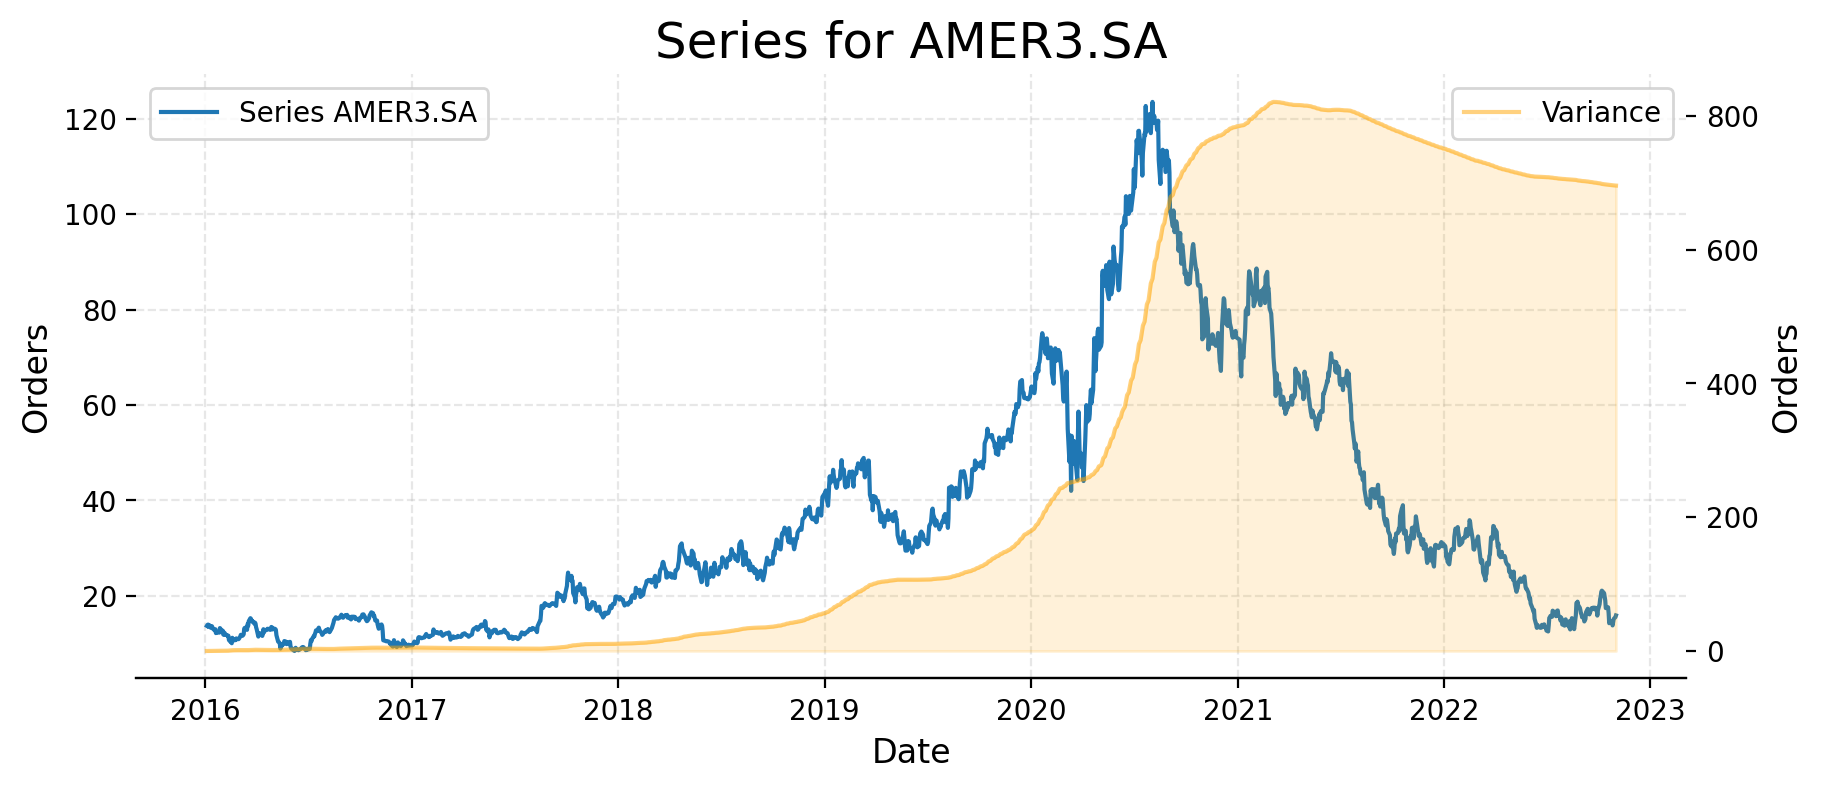

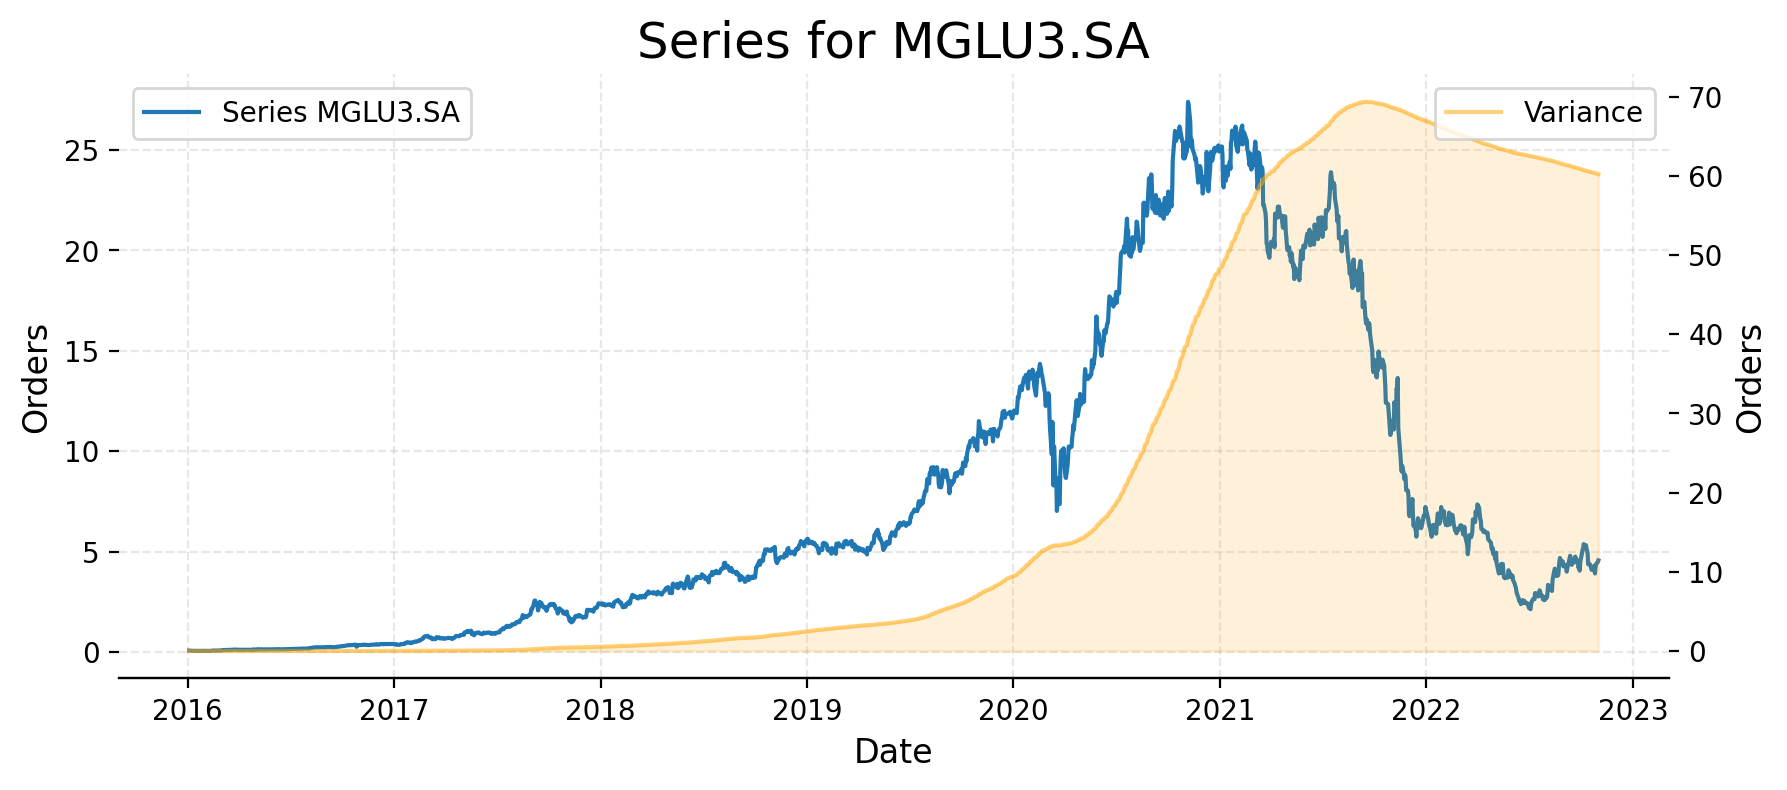

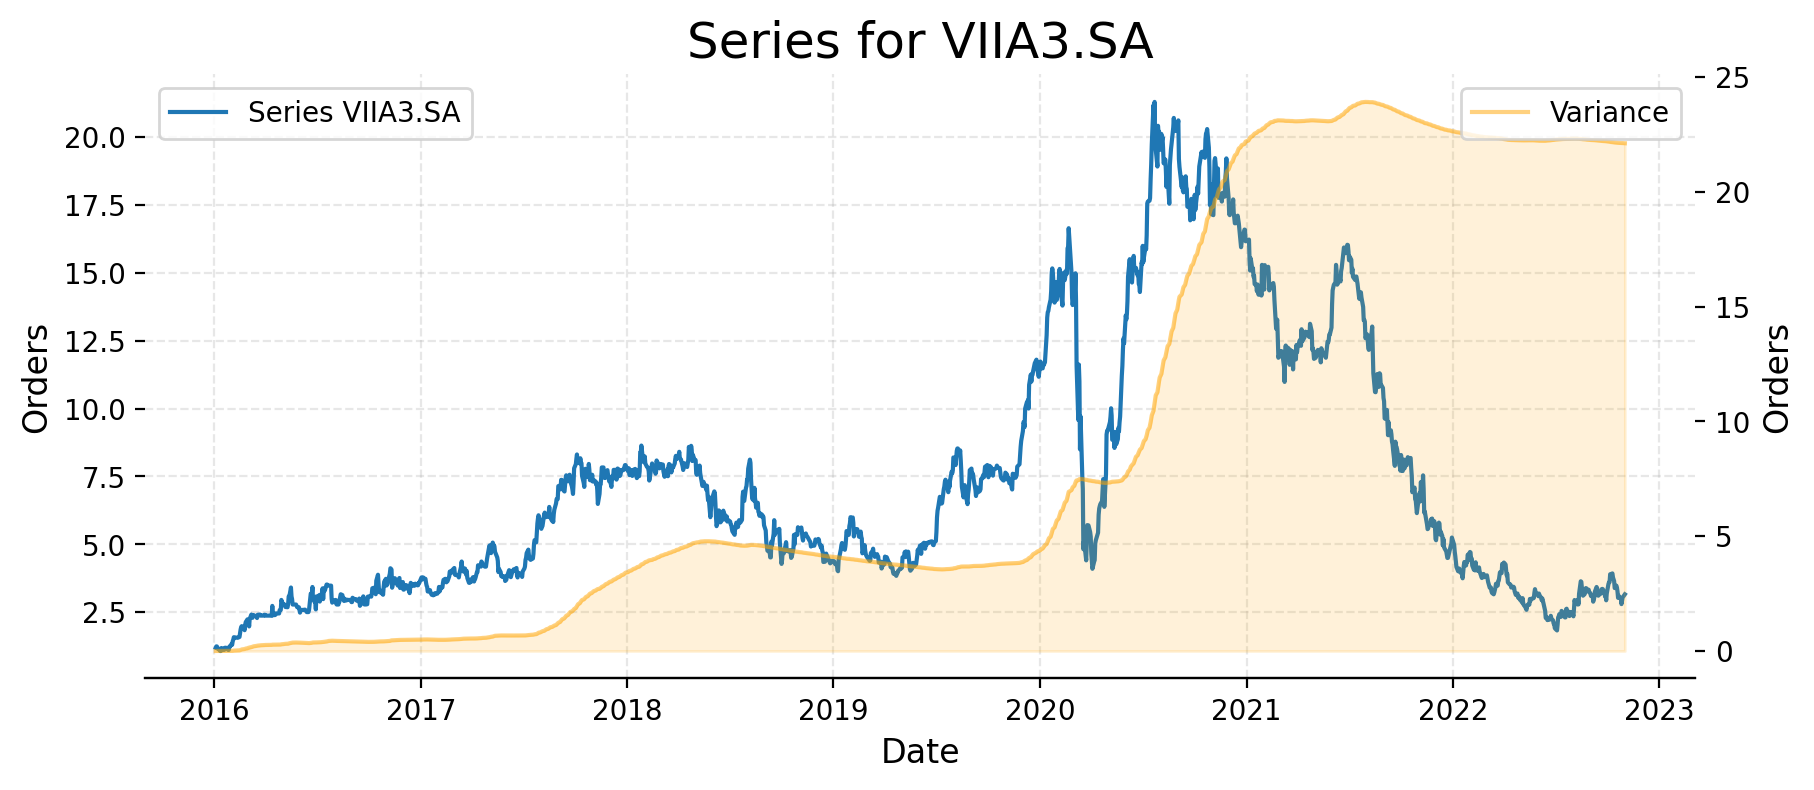

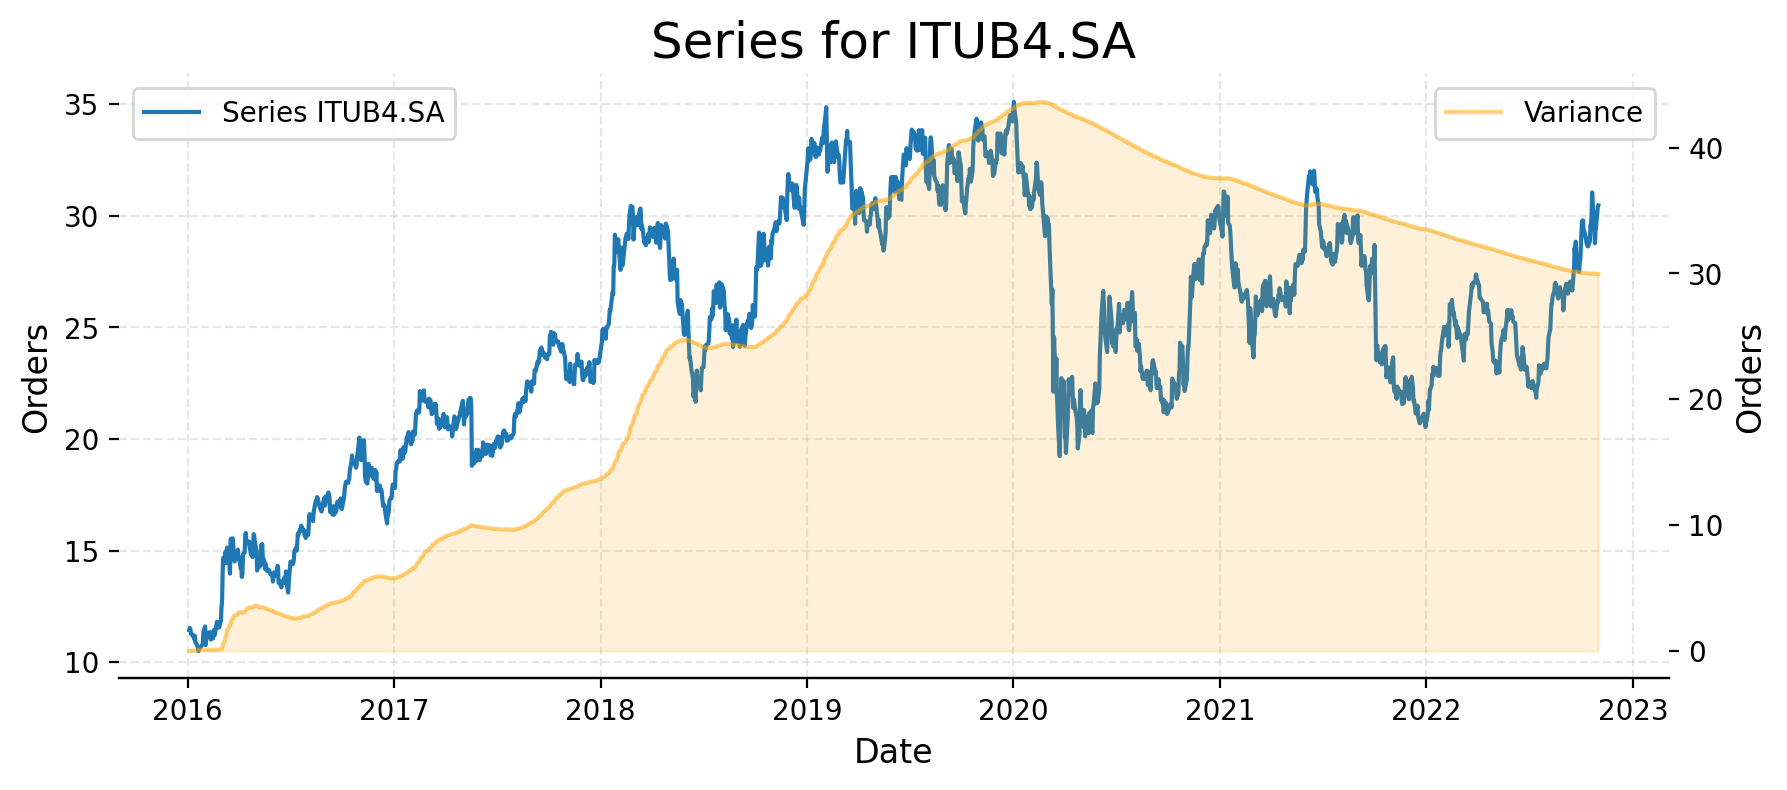

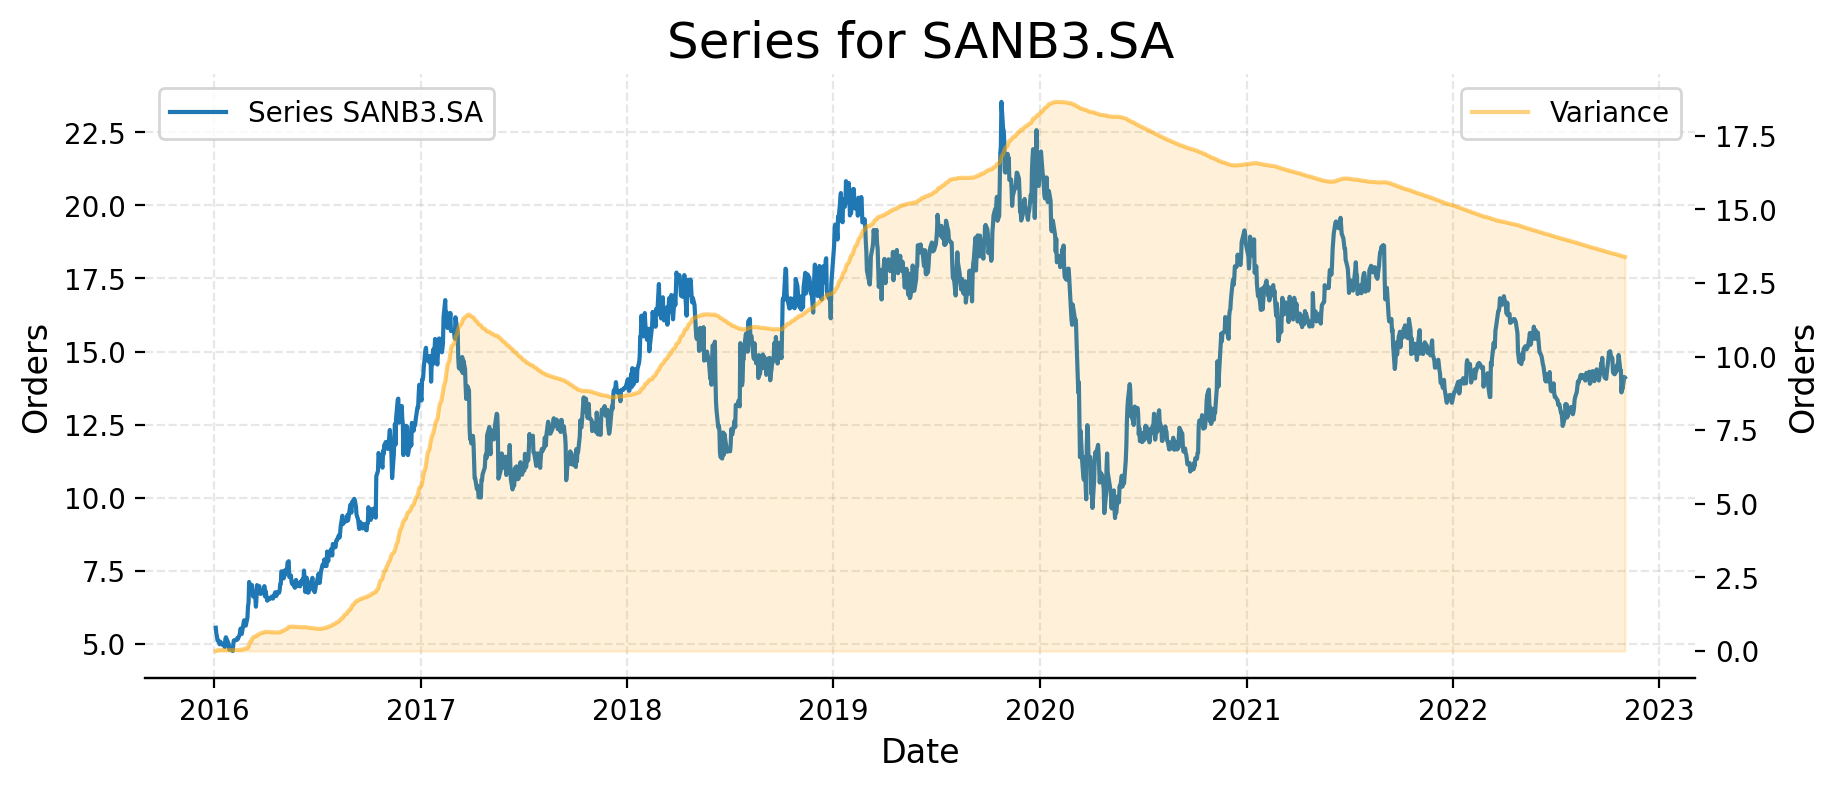

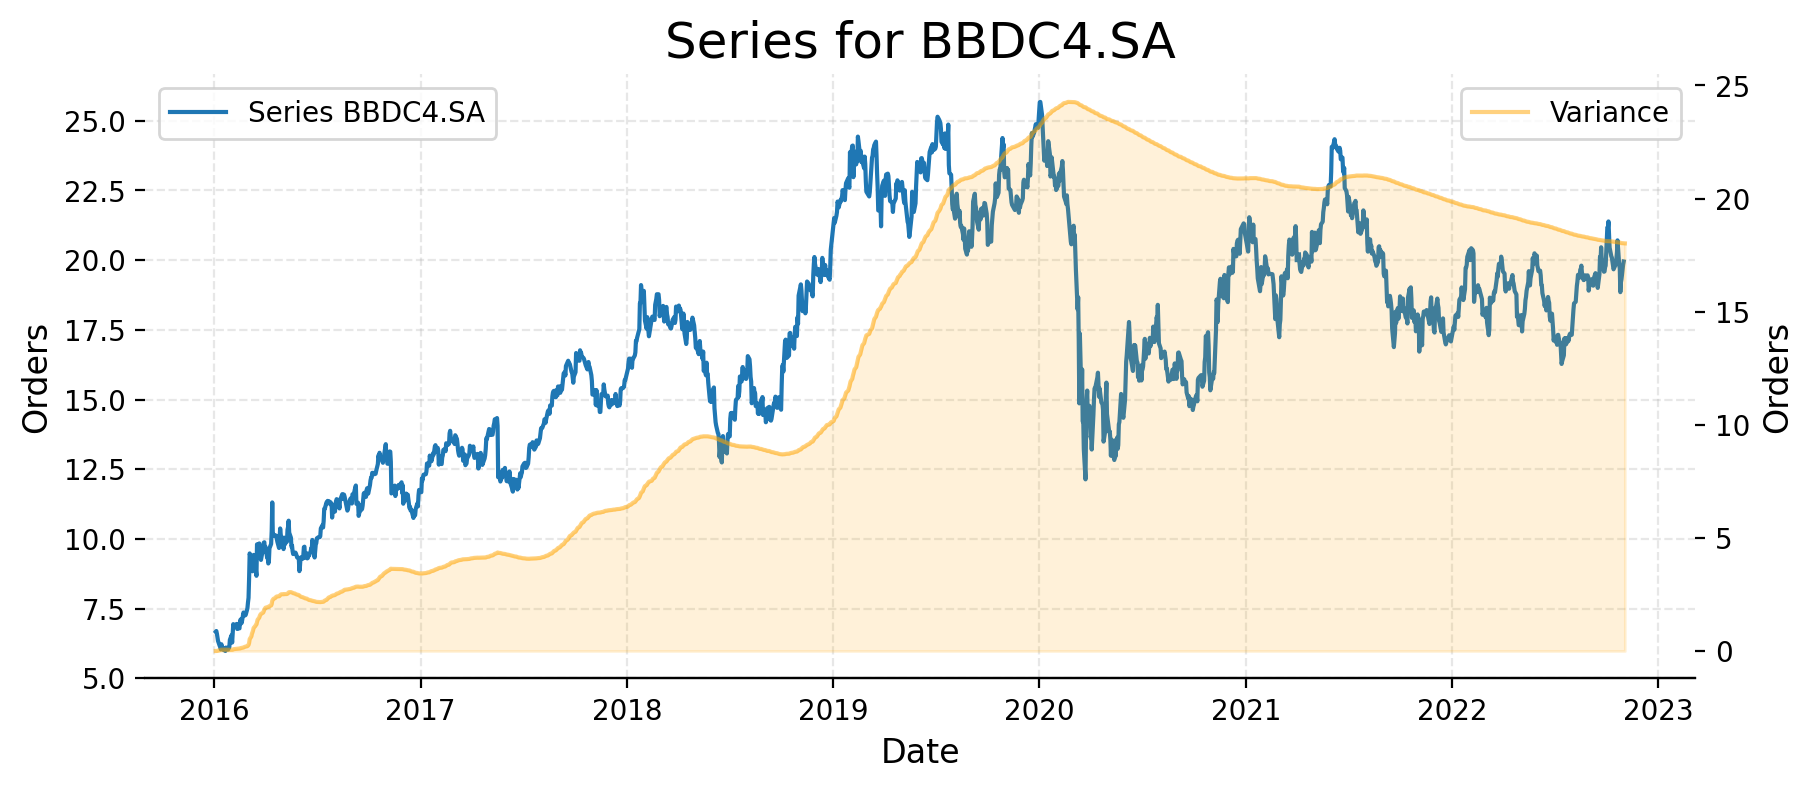

In [434]:
for key in dict_results.keys():
    plot_series_analysis(dict_results[key], ts_name=key, compute_variance=True)

# Log Return Analysis

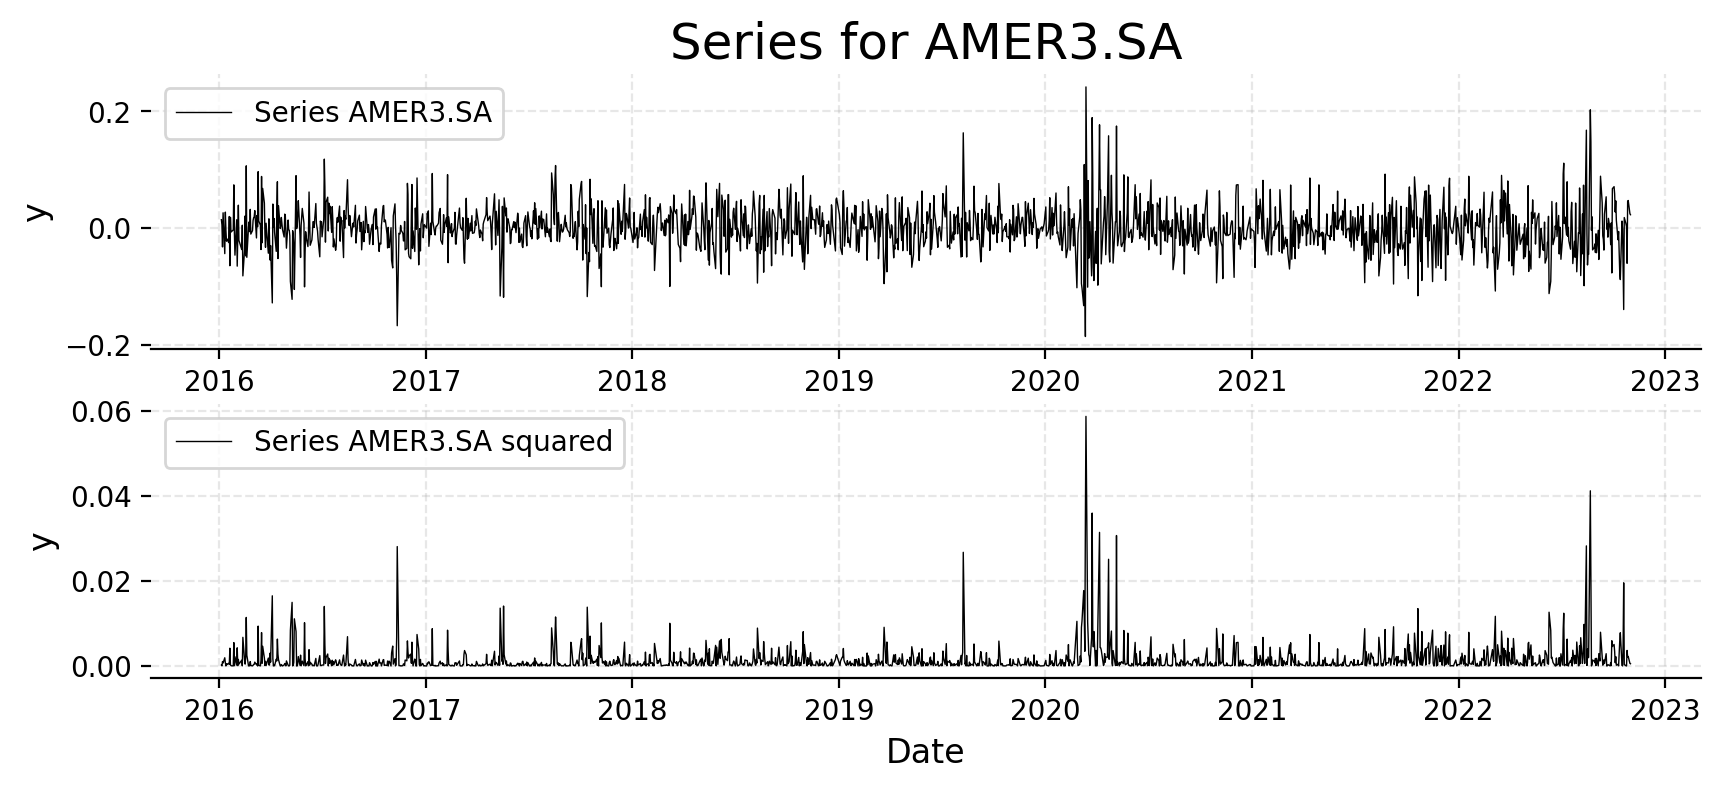

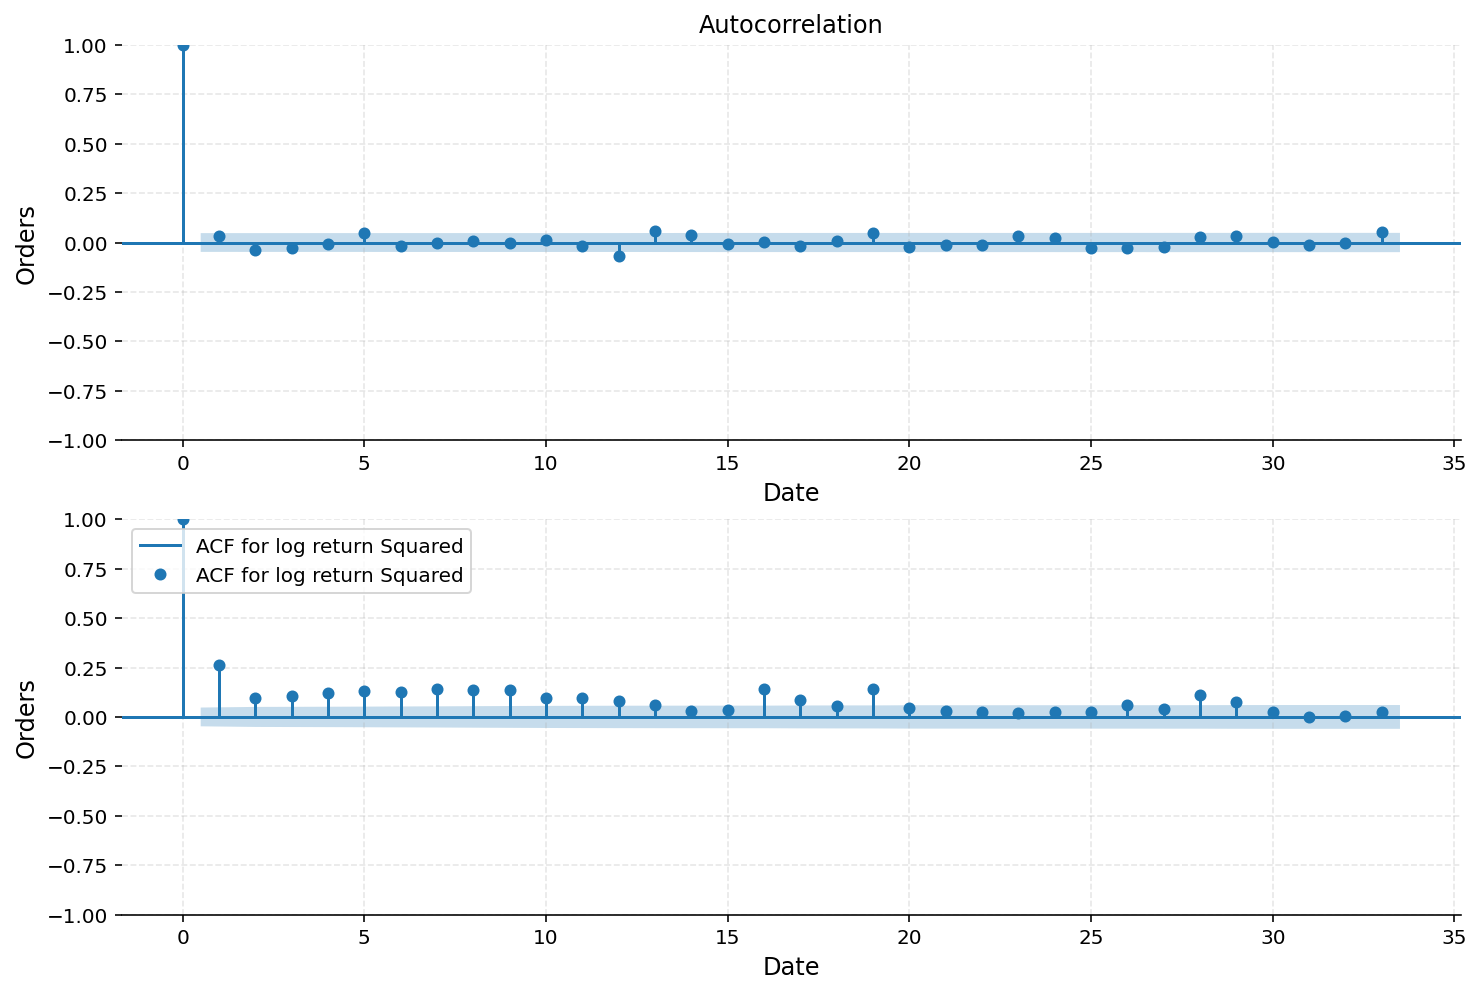

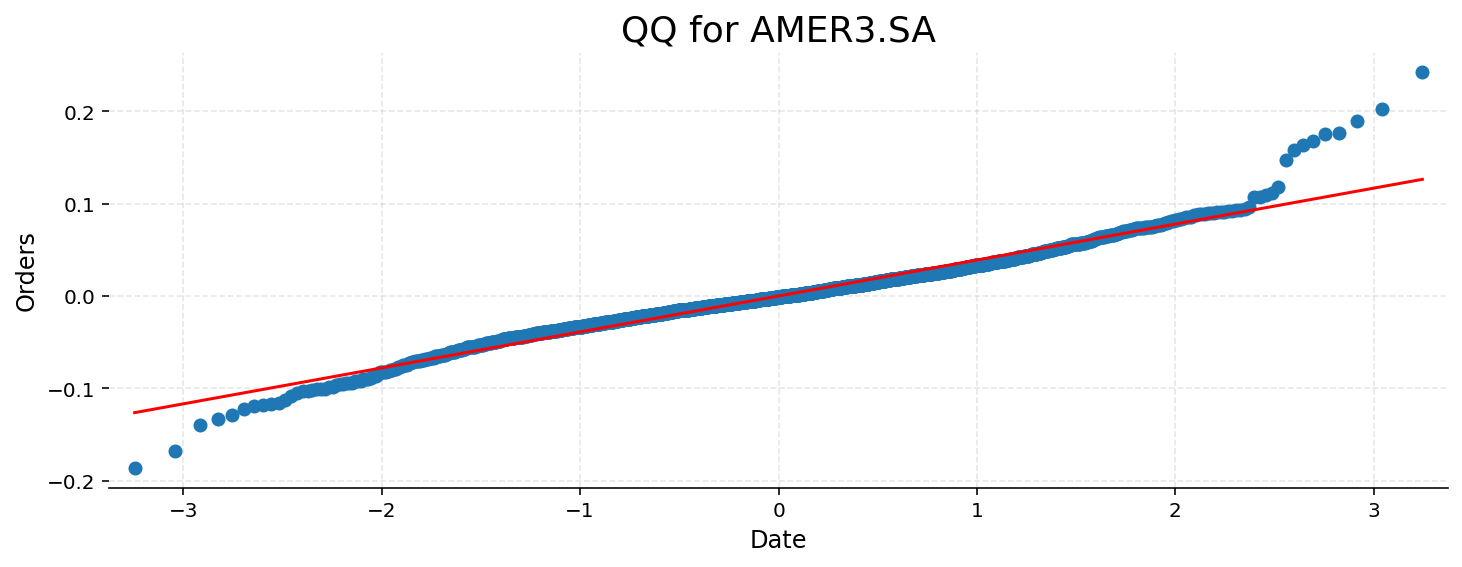

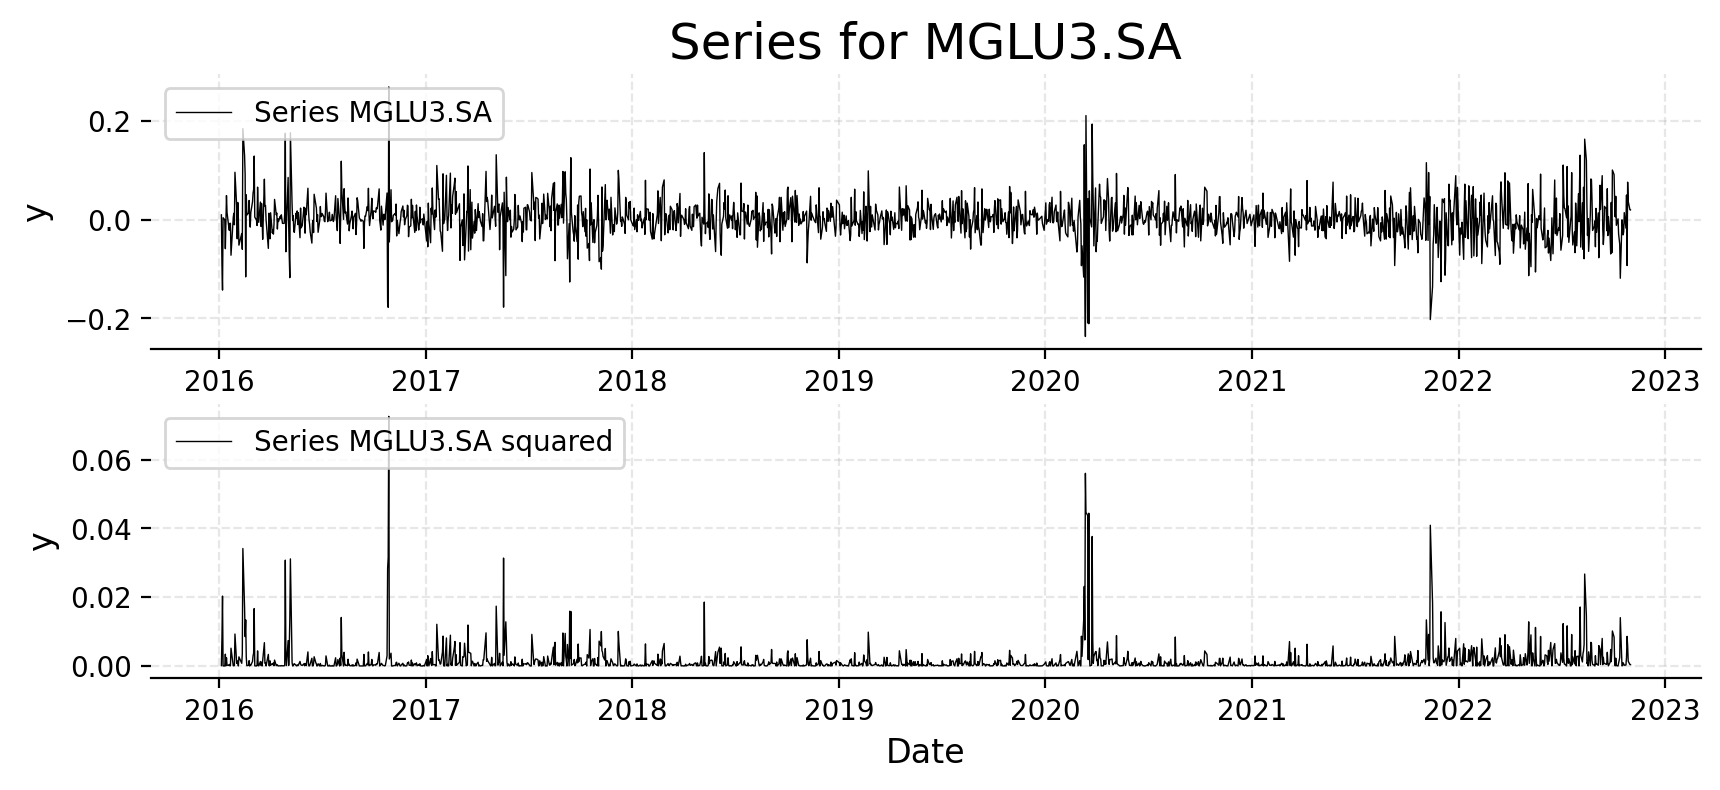

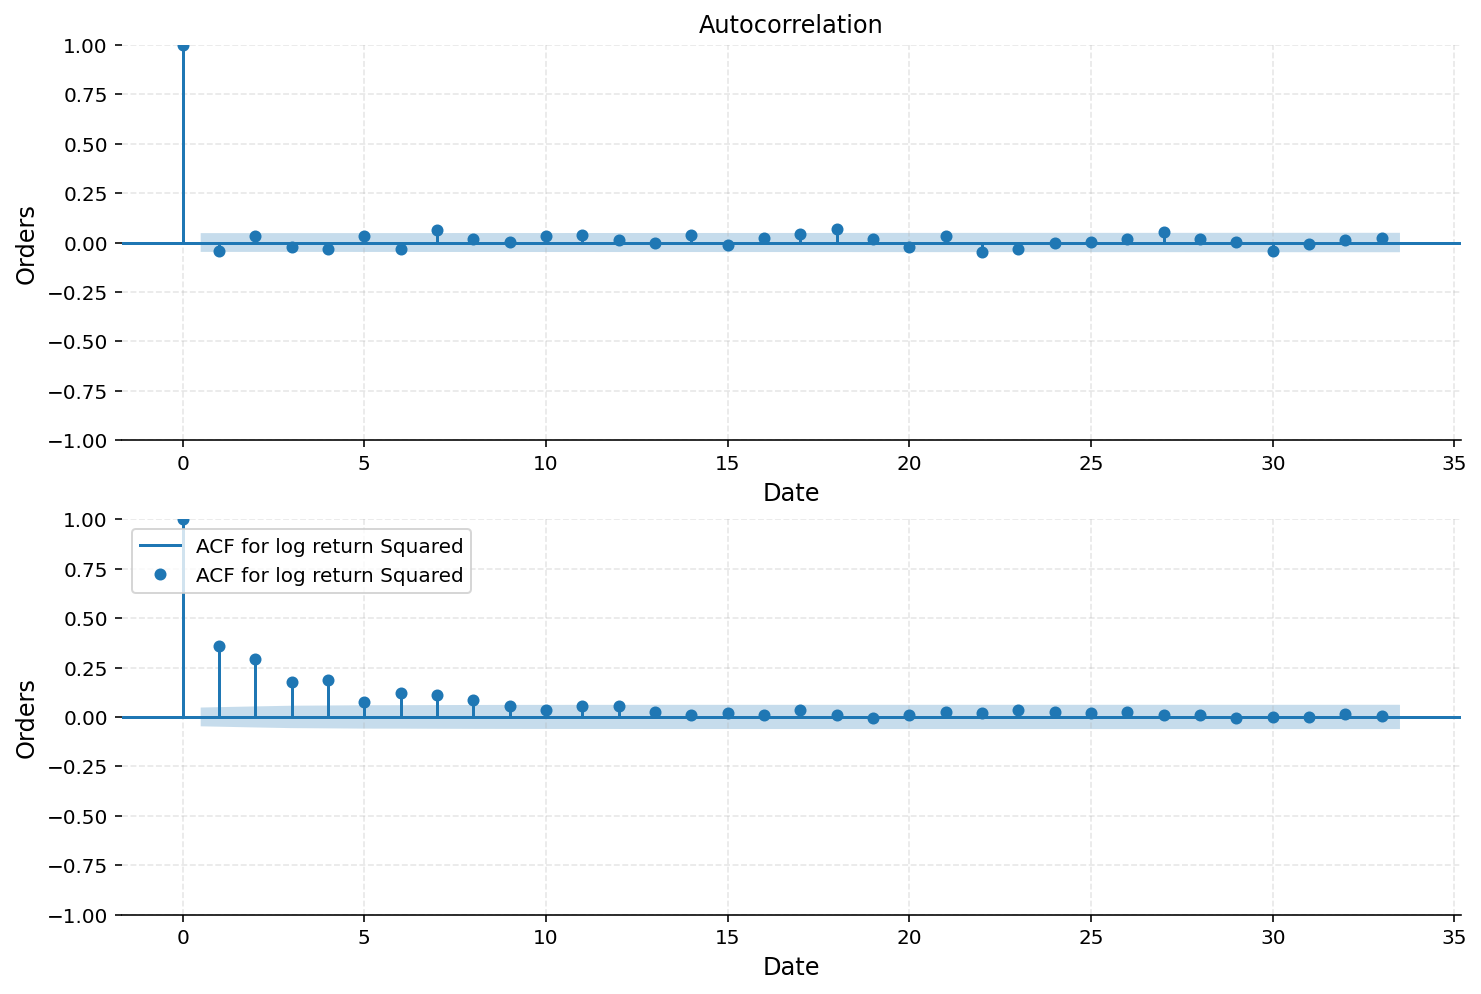

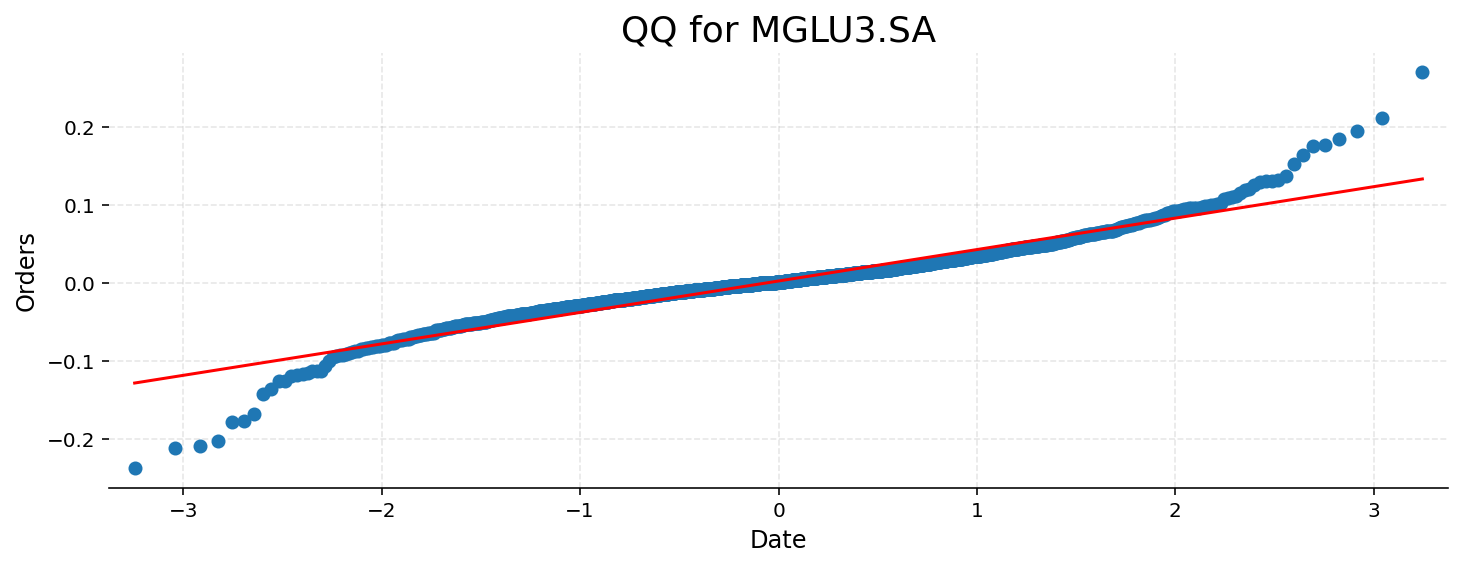

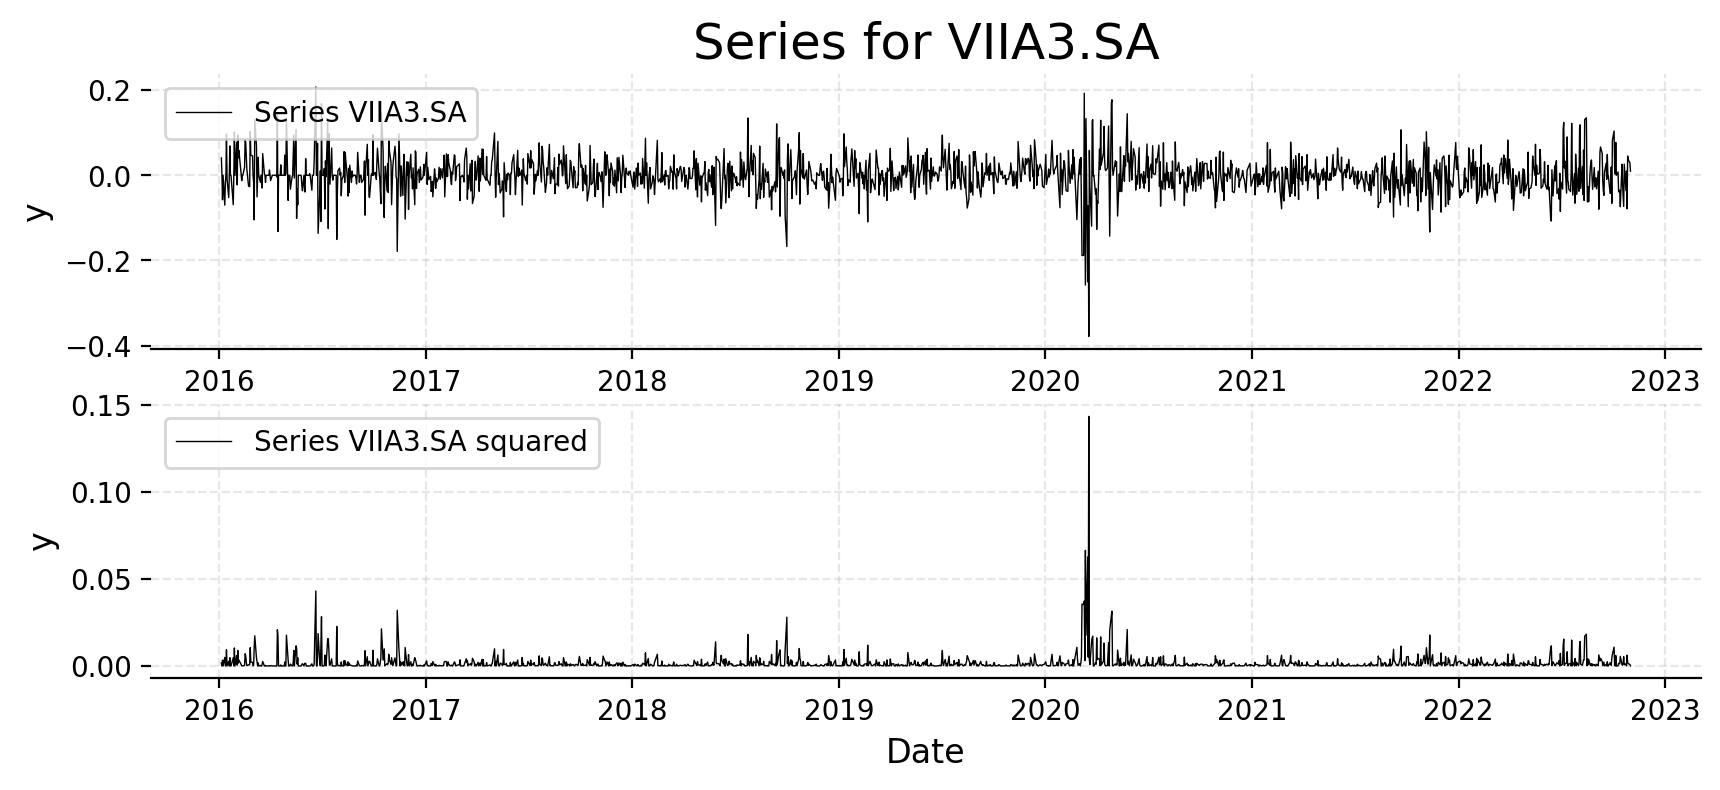

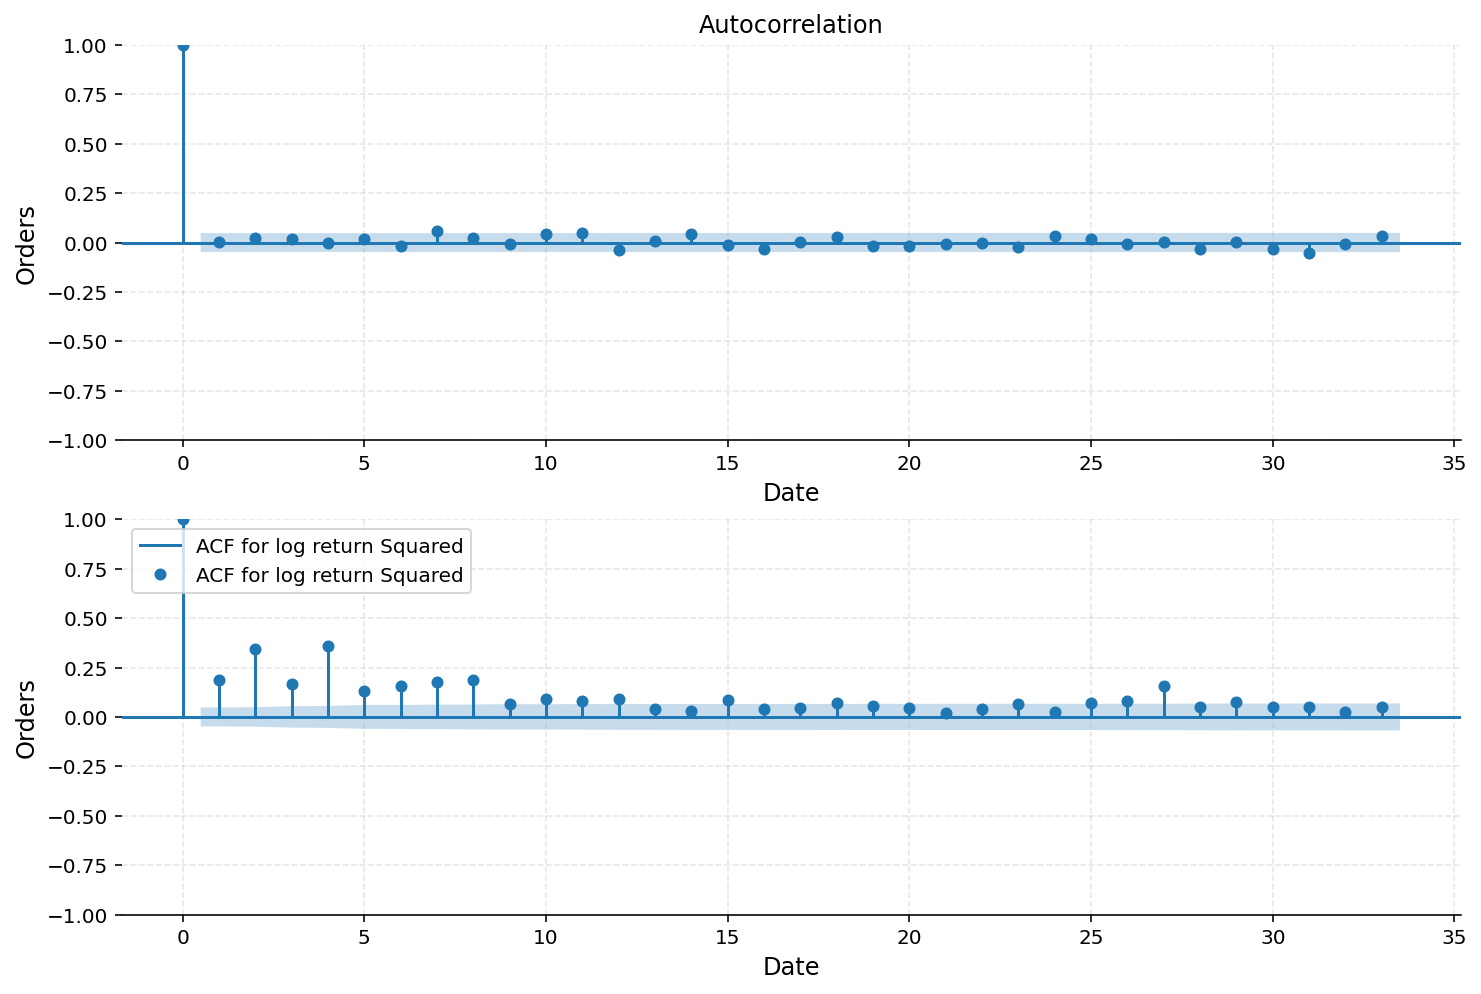

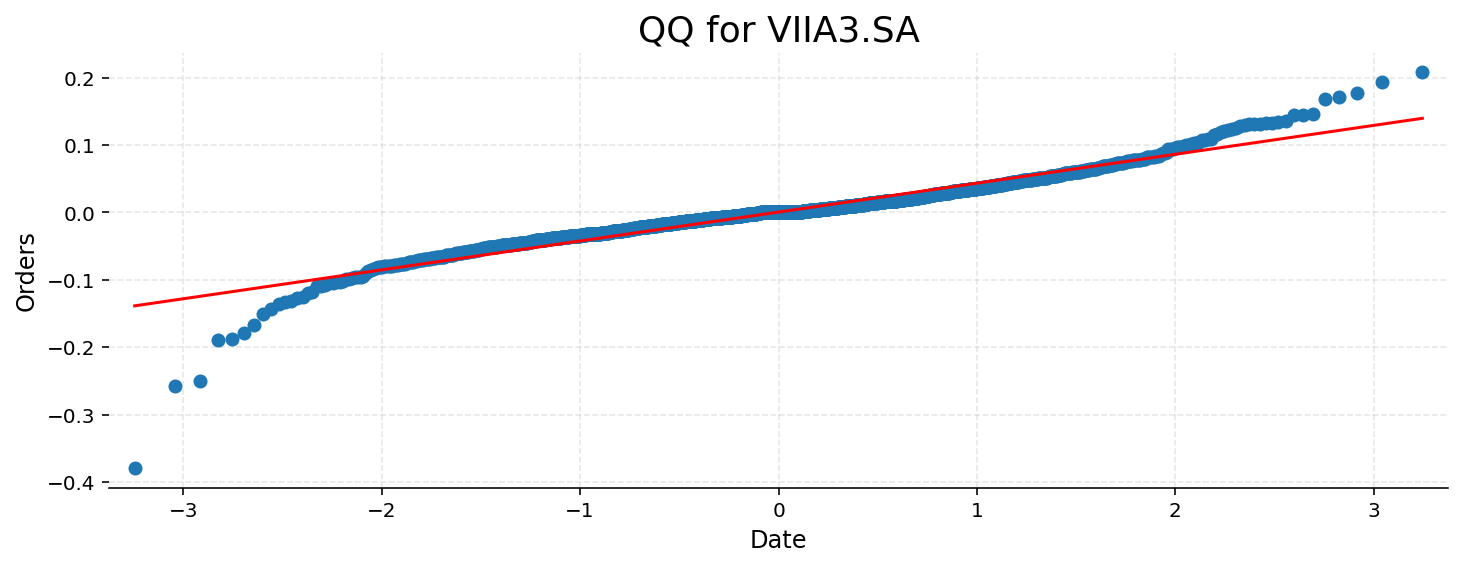

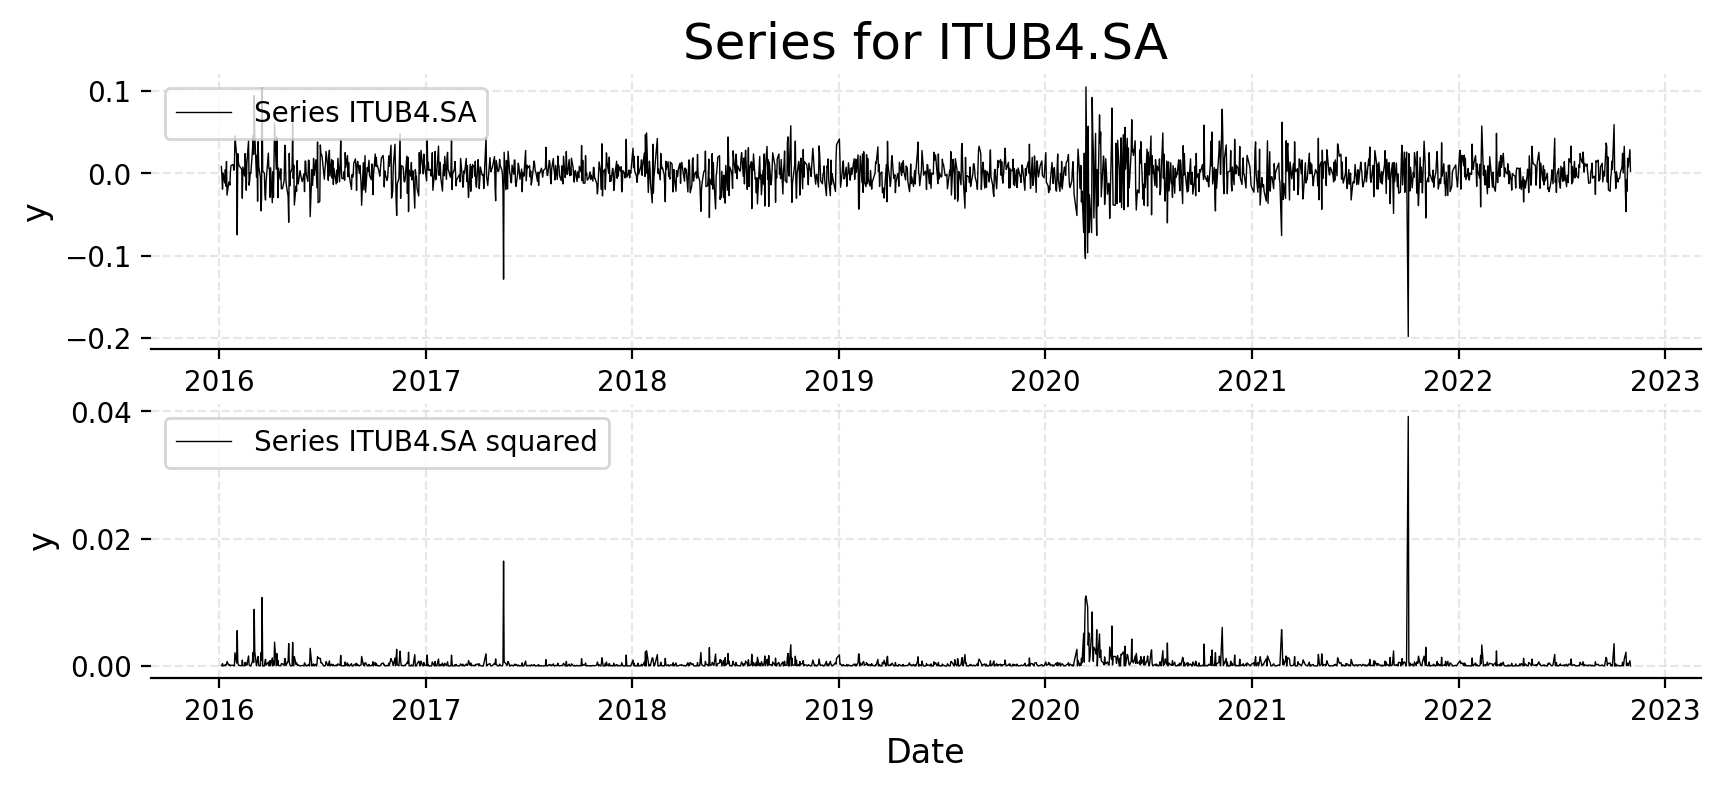

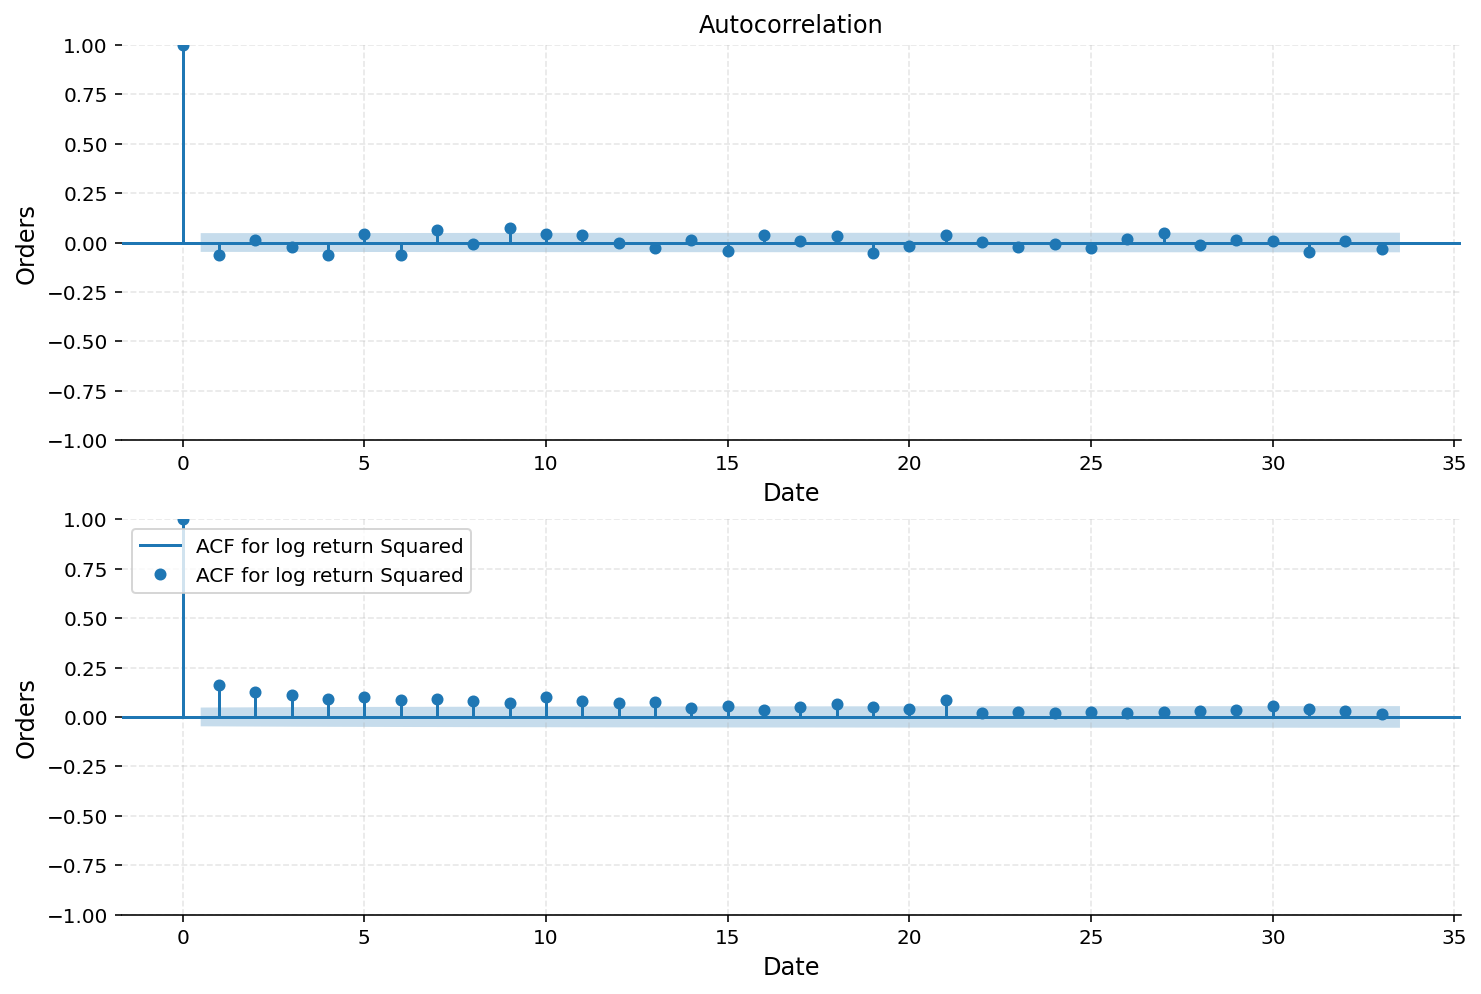

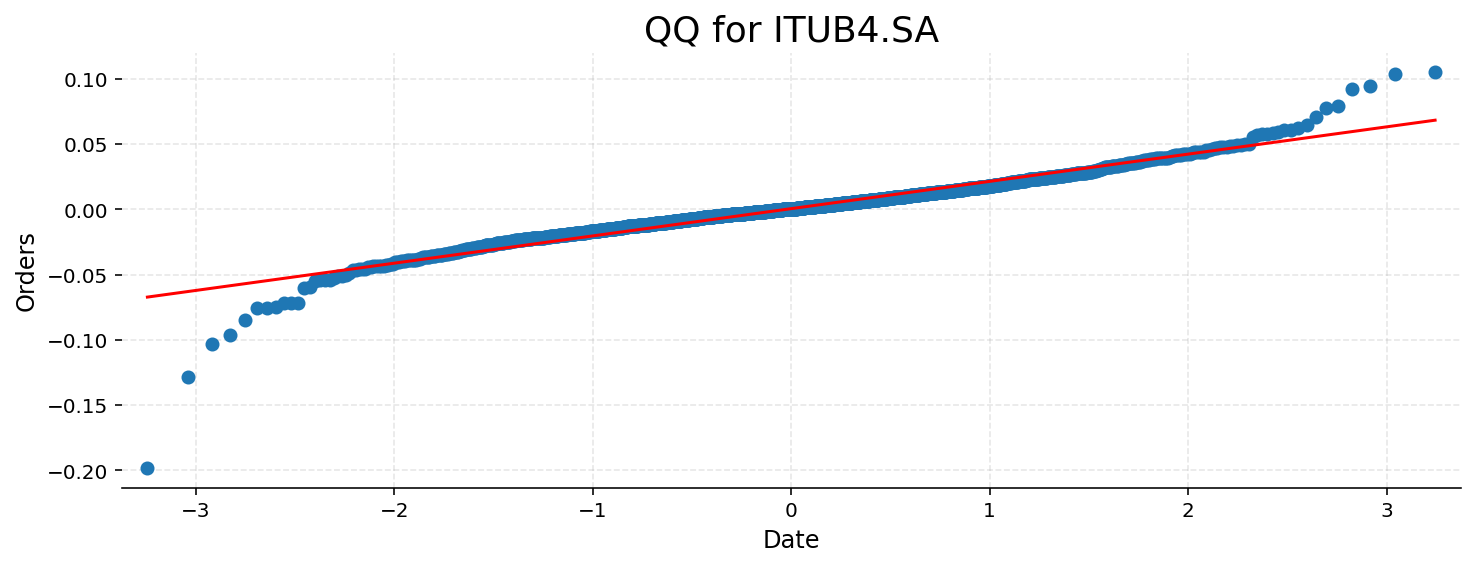

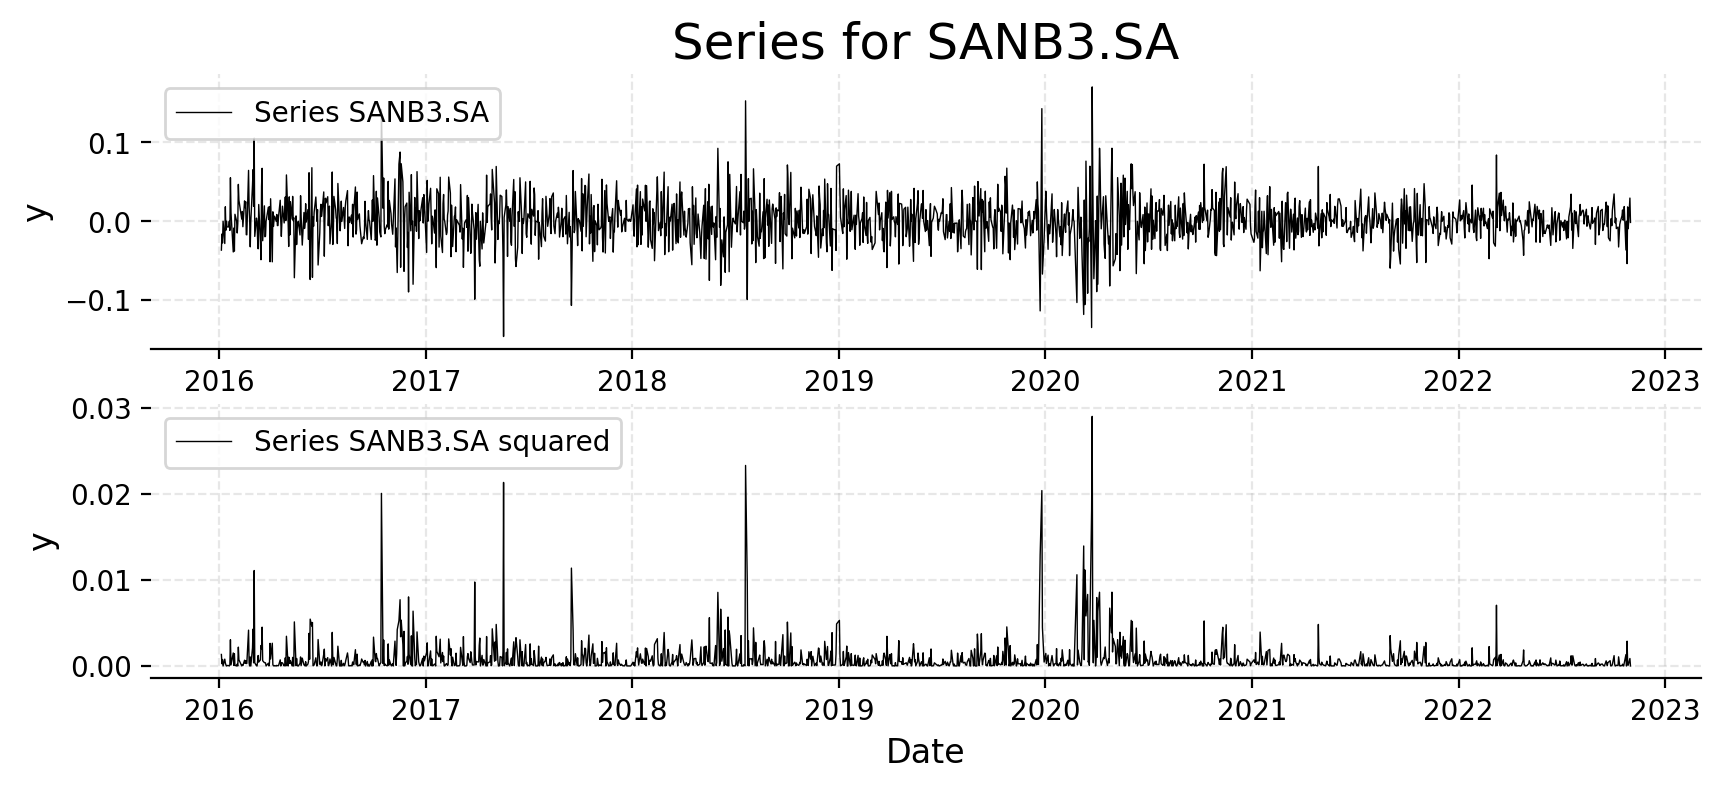

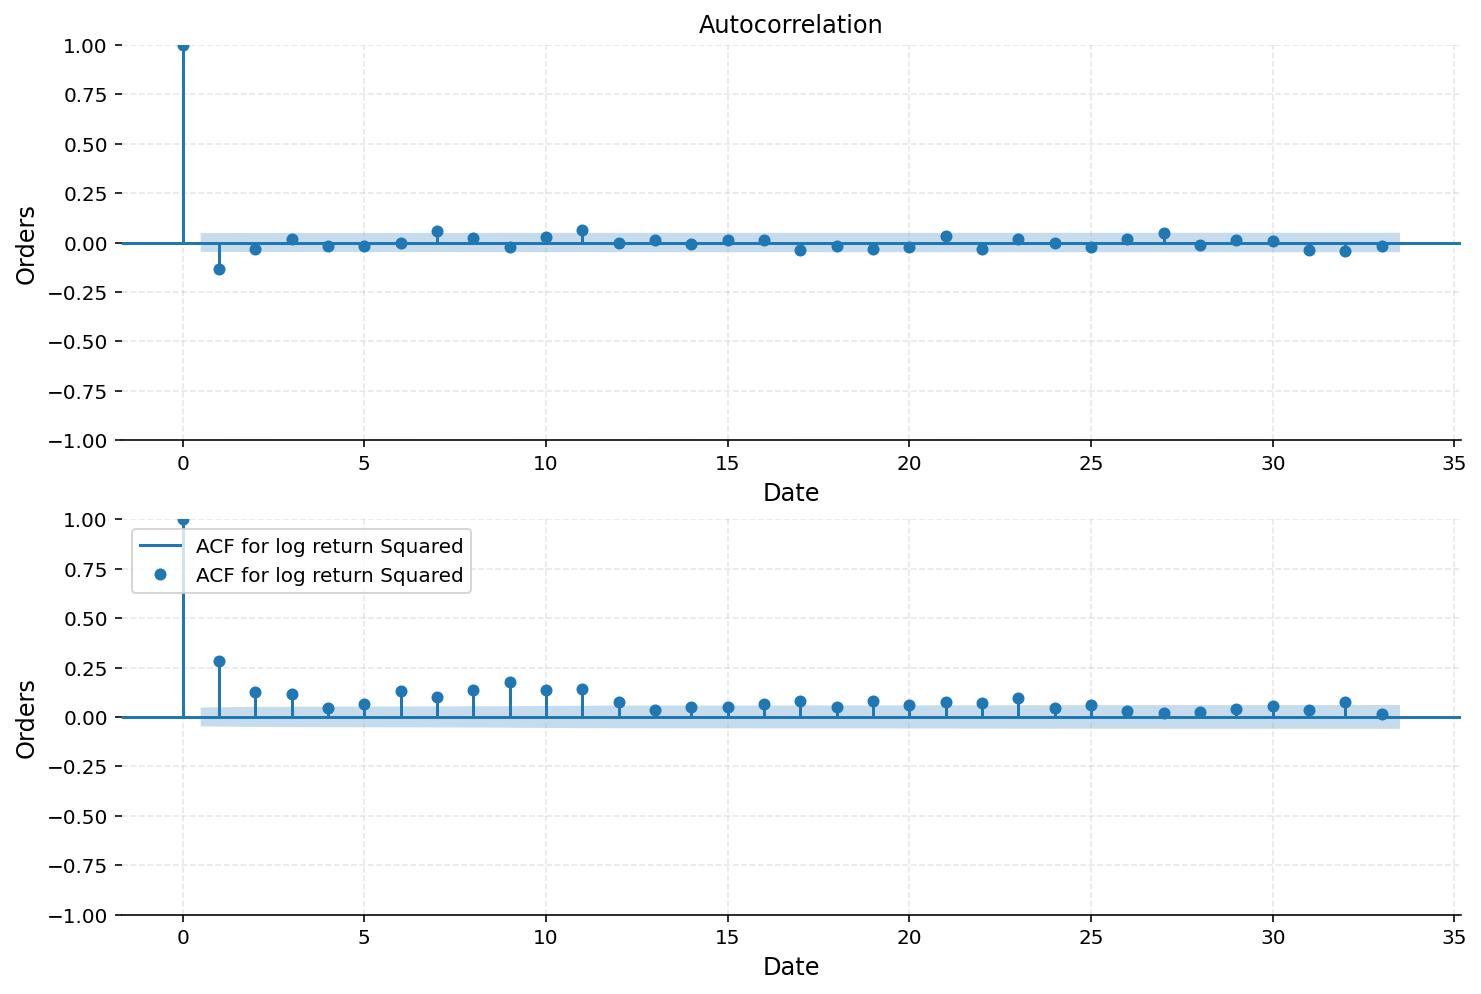

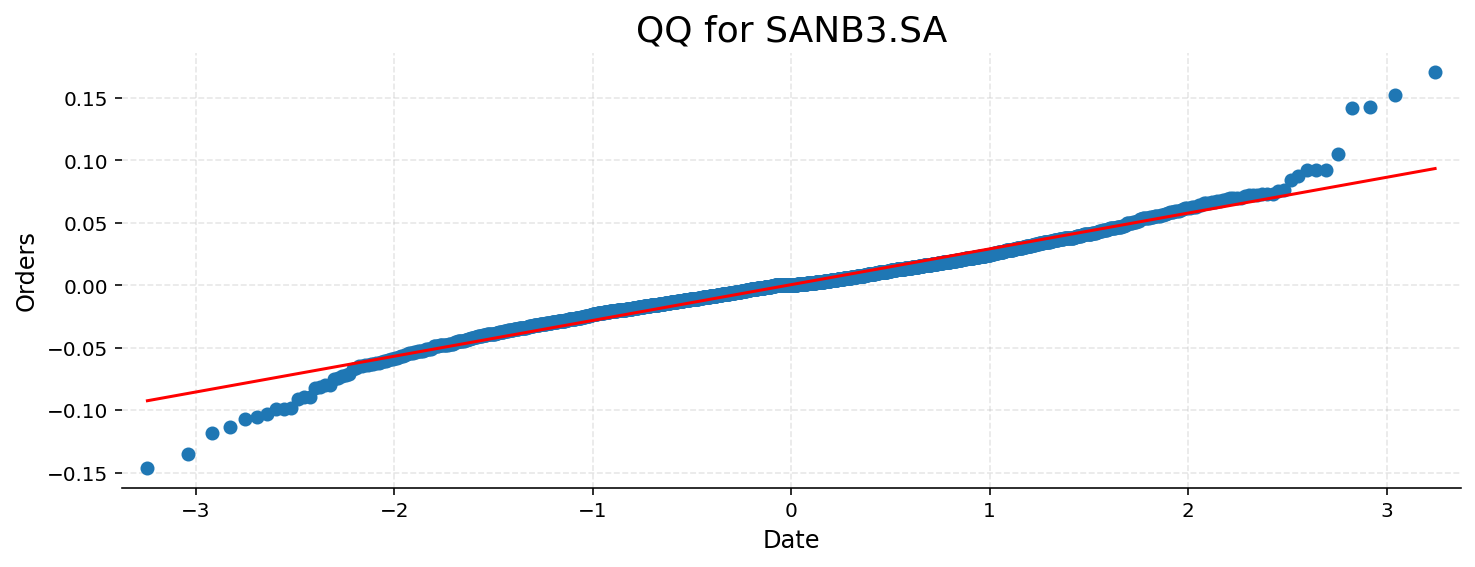

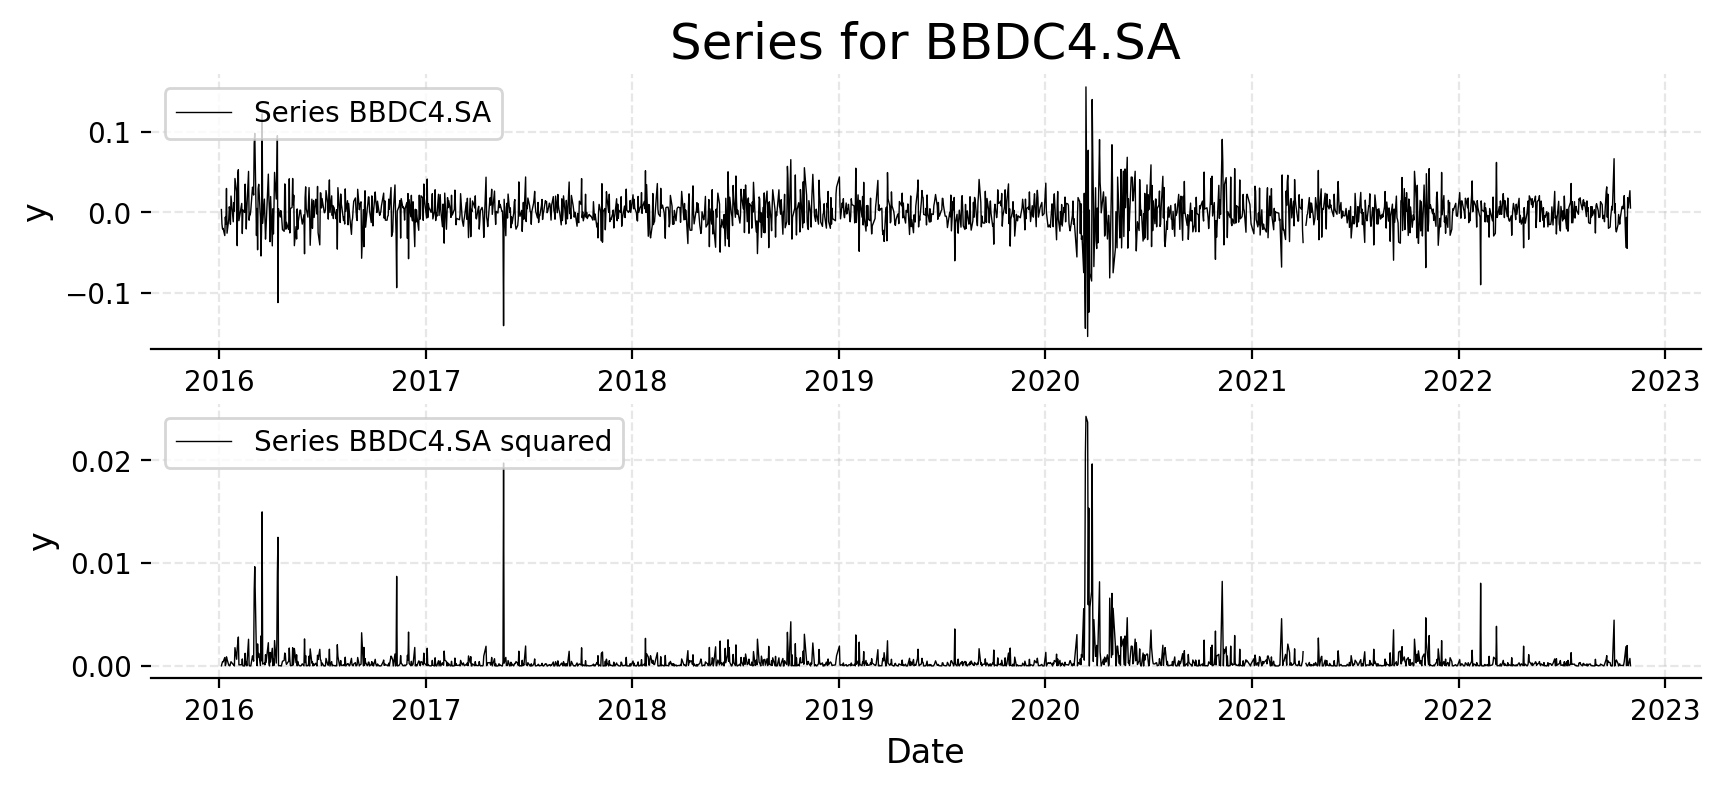

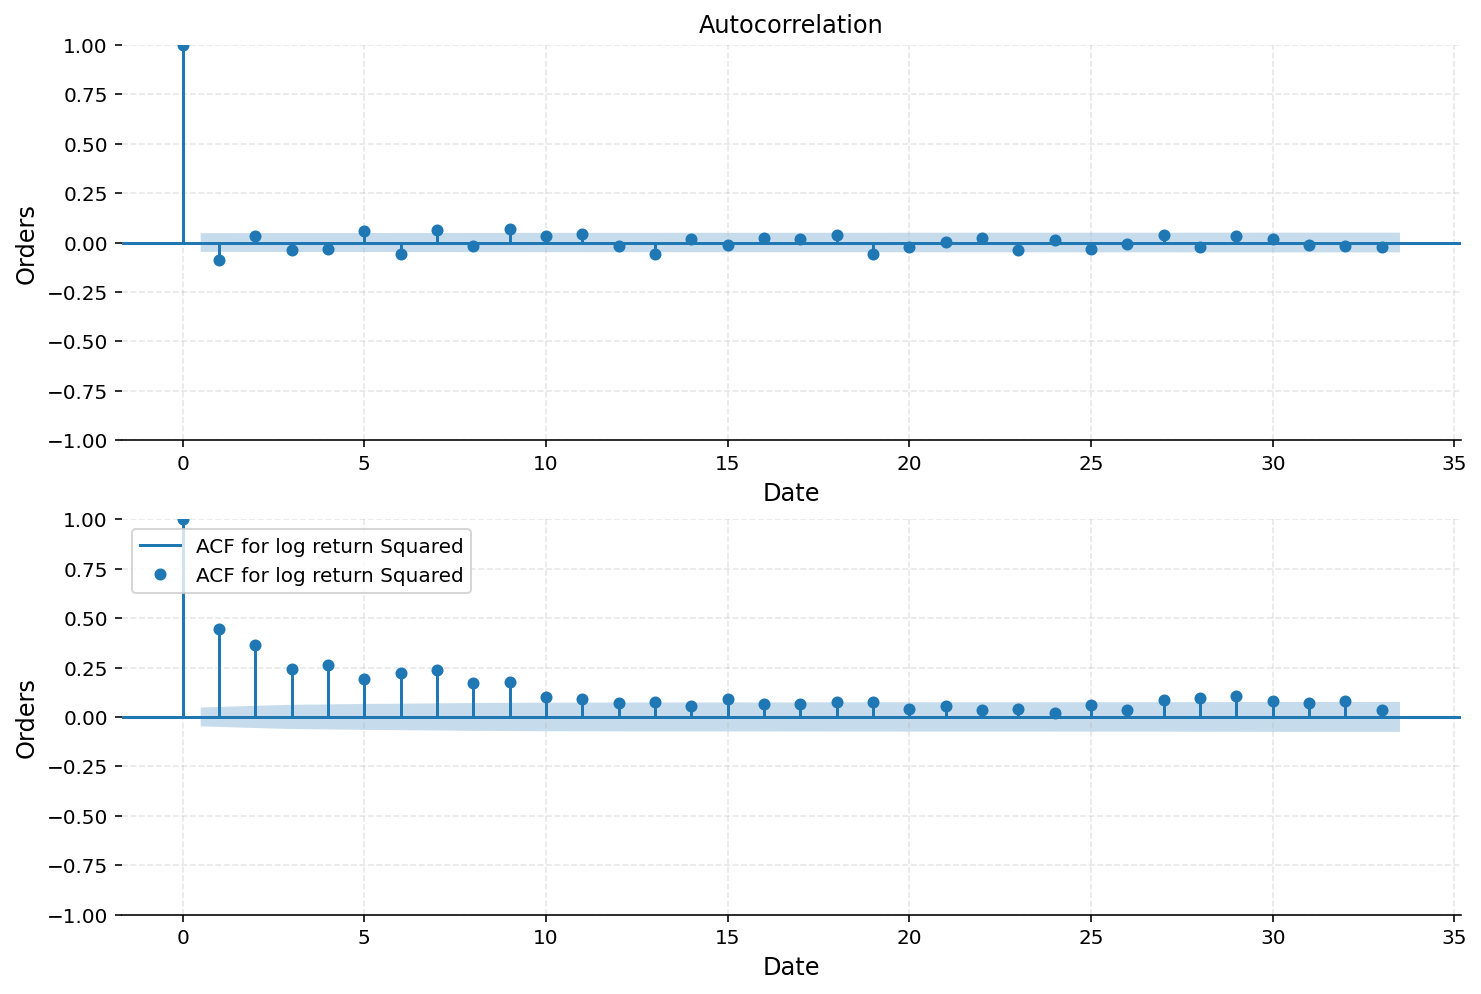

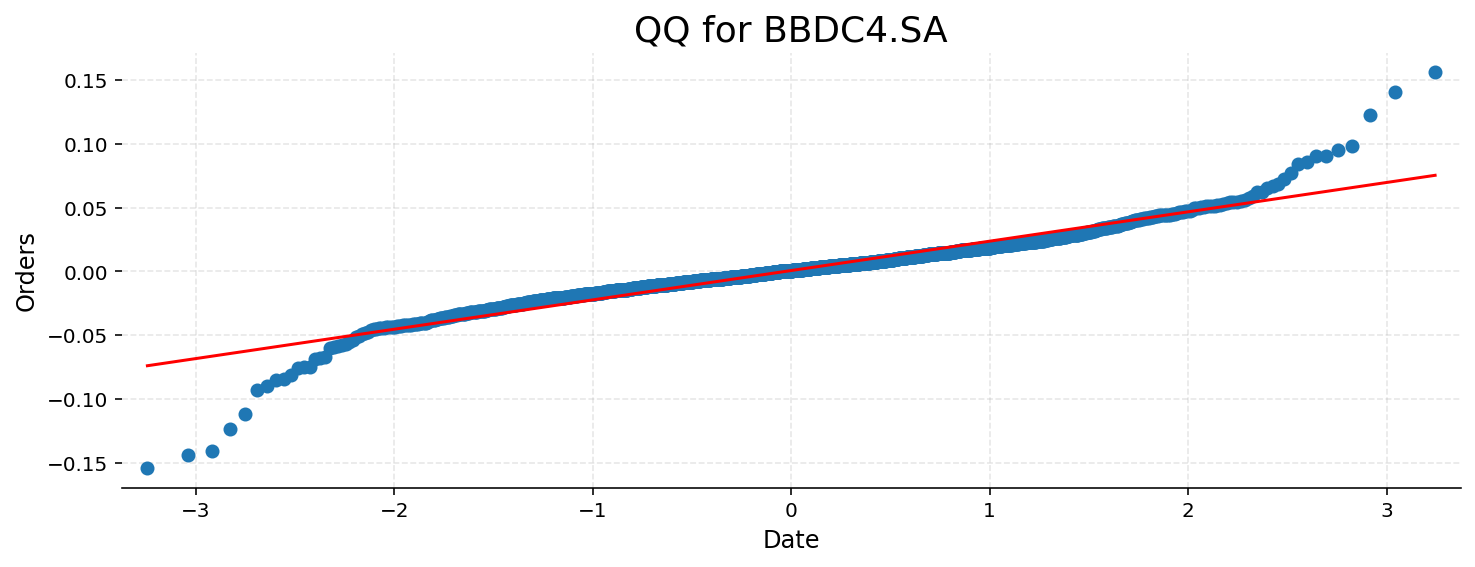

In [435]:
for key in dict_results.keys():
    plot_log_return_analysis(dict_results[key], ts_name=key, compute_variance=True)

In [390]:
y = dict_results['MGLU3.SA']['log_return'].dropna()

In [391]:
y

Date
2016-01-05 00:00:00-02:00    0.009976
2016-01-06 00:00:00-02:00   -0.090581
2016-01-07 00:00:00-02:00   -0.142549
2016-01-08 00:00:00-02:00    0.004181
2016-01-11 00:00:00-02:00    0.000000
                               ...   
2022-10-26 00:00:00-03:00   -0.092749
2022-10-27 00:00:00-03:00    0.076298
2022-10-28 00:00:00-03:00    0.037214
2022-10-31 00:00:00-03:00    0.020340
2022-11-01 00:00:00-03:00    0.019934
Name: log_return, Length: 1701, dtype: float64

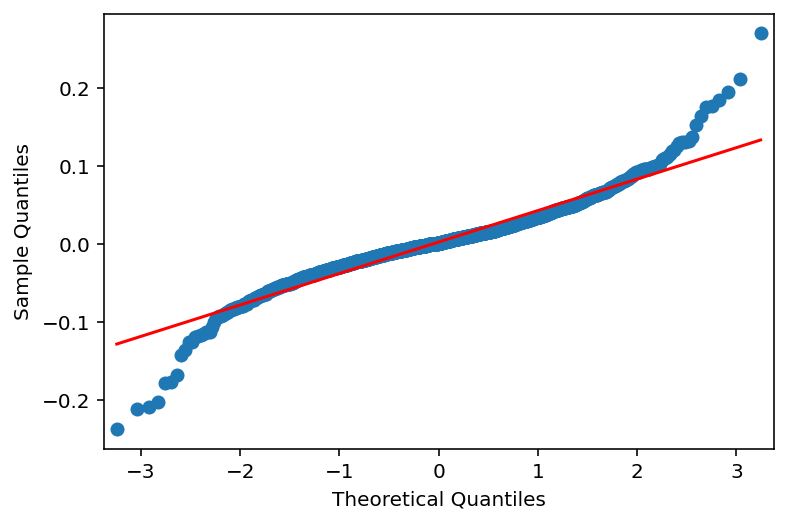